In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/sebastian/Documents/School/Bachelor/bachelor-final/Dataset/PROCESSED_RESTAURANT_REVIEWS_5k.csv")

Text(0.5, 1.0, 'Distribution of ratings')

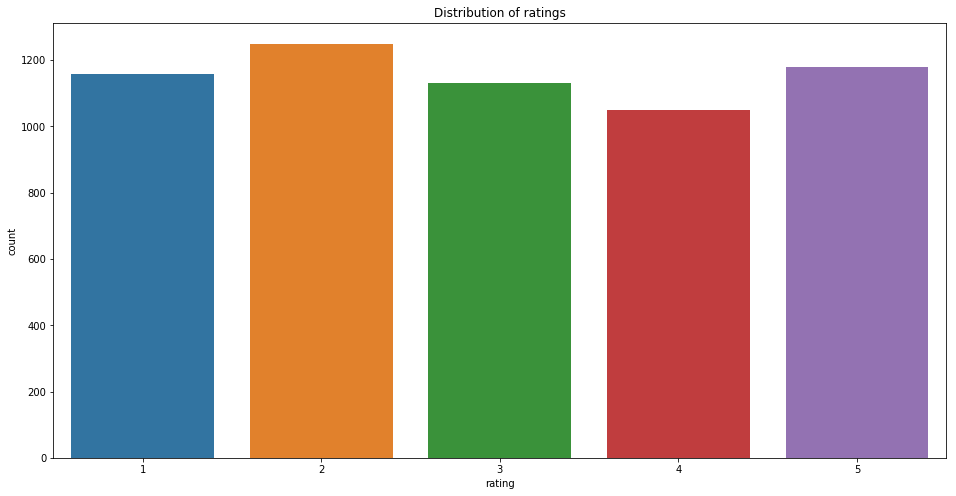

In [3]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data["rating"])
plt.title("Distribution of ratings")

In [4]:
text = data['reviewCleanNoStopwords']

In [8]:
dataGoodBad = data

In [10]:
dataGoodBad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 13 columns):
Unnamed: 0                    5769 non-null int64
reviewContent                 5769 non-null object
usefulCount                   5769 non-null int64
coolCount                     5769 non-null int64
funnyCount                    5769 non-null int64
rating                        5769 non-null int64
restaurantID                  5769 non-null object
reviewCleanWithStopwords      5769 non-null object
reviewCleanNoStopwords        5769 non-null object
reviewCleanPorterStemmer      5769 non-null object
reviewCleanSnowballStemmer    5769 non-null object
reviewCleanLemmatized         5769 non-null object
reviewCleanLancaster          5769 non-null object
dtypes: int64(5), object(8)
memory usage: 586.0+ KB


In [11]:
# Get names of indexes for which column rating has value 2
indexNamesRating3 = dataGoodBad[ dataGoodBad['rating'] == 3 ].index
 
# Delete these row indexes from dataFrame
dataGoodBad.drop(indexNamesRating3, inplace=True)

In [12]:
dataGoodBad.rating.value_counts()

2    1250
5    1179
1    1159
4    1051
Name: rating, dtype: int64

In [13]:
# transform 1 and 2 stars to rating 0 and 4 and 5 stars to rating 1
dataGoodBad['rating'] = dataGoodBad['rating'].apply(lambda x: 1 if x>3 else 0)

In [14]:
dataGoodBad.rating.value_counts()

0    2409
1    2230
Name: rating, dtype: int64

In [15]:
goodReviews = dataGoodBad.loc[dataGoodBad['rating'] == 1]
badReviews = dataGoodBad.loc[dataGoodBad['rating'] == 0]

In [19]:
positive_string = []
for t in goodReviews.reviewCleanNoStopwords:
    positive_string.append(t)
pos_text = pd.Series(positive_string).str.cat(sep=' ')
pos_text[:100]

"divine dialogue god britton times world going end tomorrow i'm making rounds know asking everyone wo"

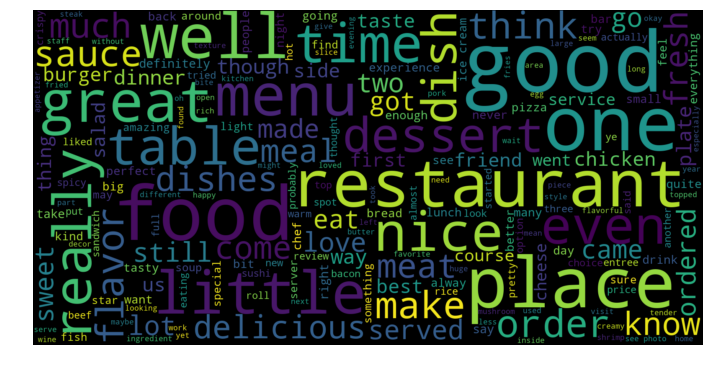

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
negative_string = []
for t in badReviews.reviewCleanNoStopwords:
    negative_string.append(t)
neg_text = pd.Series(negative_string).str.cat(sep=' ')
neg_text[:100]

'check please bartender unable recommend beer tap tried check bartender went outside every minutes ip'

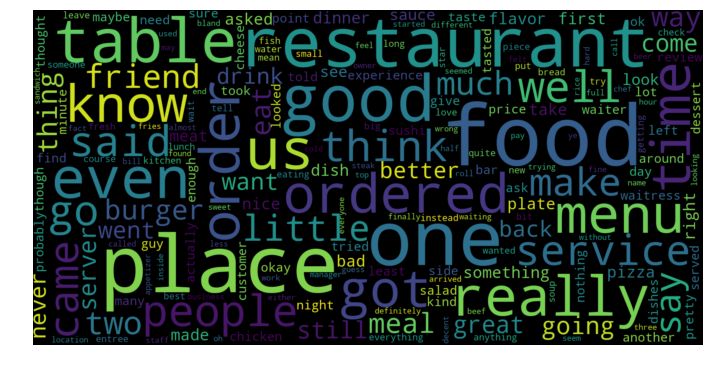

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()